## IMPORT NECESSARY LIBRARIES

# 1.DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


## IMPORT DATASETS

In [2]:
df_training=pd.read_csv("C:\\Users\\user\\Desktop\\customer_churn_dataset-training-master.csv")
df_testing=pd.read_csv("C:\\Users\\user\\Downloads\\archive (2)\\customer_churn_dataset-testing-master.csv")

In [3]:
df_training

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [4]:
df_testing

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [5]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


## DATA CLEANING

###  1.Checking for null values and removing it

In [7]:
traning_null_counts=df_training.isnull().sum()
traning_null_counts

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [8]:
rows_with_null_training = df_training[df_training.isnull().any(axis=1)]
rows_with_null_training

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_training=df_training.dropna()
df_training

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [10]:
null_counts=df_testing.isnull().sum()
null_counts

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

### 2.Finding duplicates

In [11]:
train_duplicate_count=df_training.duplicated().sum()
train_duplicate_count

0

In [12]:
test_duplicate_count=df_testing.duplicated().sum()
test_duplicate_count

0

### 3.Data formatting

#### 3.1 converting float to int values

In [13]:
# Assuming df_training is your DataFrame
df_training.loc[:,'Age'] = df_training['Age'].astype(int)
df_training.loc[:,'CustomerID'] = df_training['CustomerID'].astype(int)
df_training.loc[:,'Tenure'] = df_training['Tenure'].astype(int)
df_training.loc[:,'Usage Frequency'] = df_training['Usage Frequency'].astype(int)
df_training.loc[:,'Support Calls'] = df_training['Support Calls'].astype(int)
df_training.loc[:,'Payment Delay'] = df_training['Payment Delay'].astype(int)
df_training.loc[:,'Total Spend'] = df_training['Total Spend'].astype(int)
df_training.loc[:,'Last Interaction'] = df_training['Last Interaction'].astype(int)
df_training.loc[:,'Churn'] = df_training['Churn'].astype(int)

df_training

C:\Users\user\AppData\Local\Temp\ipykernel_11172\4292955526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training.loc[:,'Age'] = df_training['Age'].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_11172\4292955526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training.loc[:,'CustomerID'] = df_training['CustomerID'].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_11172\4292955526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995,42,Male,54,15,1,3,Premium,Annual,716,8,0
440829,449996,25,Female,8,13,1,20,Premium,Annual,745,2,0
440830,449997,26,Male,35,27,1,5,Standard,Quarterly,977,9,0
440831,449998,28,Male,55,14,2,0,Standard,Quarterly,602,2,0


#####  .loc[] is used to make sure that whatever changes we made will reflect on the orginal dataframe

In [14]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   CustomerID         440832 non-null  int32 
 1   Age                440832 non-null  int32 
 2   Gender             440832 non-null  object
 3   Tenure             440832 non-null  int32 
 4   Usage Frequency    440832 non-null  int32 
 5   Support Calls      440832 non-null  int32 
 6   Payment Delay      440832 non-null  int32 
 7   Subscription Type  440832 non-null  object
 8   Contract Length    440832 non-null  object
 9   Total Spend        440832 non-null  int32 
 10  Last Interaction   440832 non-null  int32 
 11  Churn              440832 non-null  int32 
dtypes: int32(9), object(3)
memory usage: 28.6+ MB


### 3.2 checking names of categorical columns to check existence of errors

In [15]:
columns_to_check = ['Gender', 'Subscription Type', 'Contract Length']  
training_unique_categories = pd.unique(df_training[columns_to_check].values.ravel())
training_unique_categories

array(['Female', 'Standard', 'Annual', 'Basic', 'Monthly', 'Quarterly',
       'Male', 'Premium'], dtype=object)

#### ravel() is used to flatten multi dimensional array into one dimensional array

In [16]:
columns_to_check = ['Gender', 'Subscription Type', 'Contract Length']  # List of columns to check
training_unique_categories = pd.unique(df_testing[columns_to_check].values.ravel())
training_unique_categories

array(['Female', 'Basic', 'Monthly', 'Standard', 'Male', 'Premium',
       'Annual', 'Quarterly'], dtype=object)

In [17]:
df_training.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.344771,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.722712,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [18]:
df_testing.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# EDA

Gender Distribution:
Male      250252
Female    190580
Name: Gender, dtype: int64

Subscription Type Distribution:
Standard    149128
Premium     148678
Basic       143026
Name: Subscription Type, dtype: int64

Contract Length Distribution:
Annual       177198
Quarterly    176530
Monthly       87104
Name: Contract Length, dtype: int64

Churn Distribution:
1    249999
0    190833
Name: Churn, dtype: int64


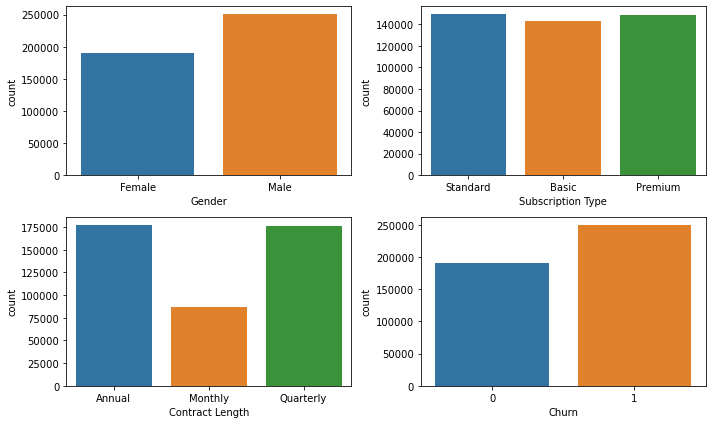

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Gender distribution
gender_distribution = df_training['Gender'].value_counts()
print("Gender Distribution:")
print(gender_distribution)

# Subscription Type distribution
subscription_distribution = df_training['Subscription Type'].value_counts()
print("\nSubscription Type Distribution:")
print(subscription_distribution)

# Contract Length distribution
contract_distribution = df_training['Contract Length'].value_counts()
print("\nContract Length Distribution:")
print(contract_distribution)

# Churn distribution
churn_distribution = df_training['Churn'].value_counts()
print("\nChurn Distribution:")
print(churn_distribution)

# Visualizing distributions
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df_training)

plt.subplot(2, 2, 2)
sns.countplot(x='Subscription Type', data=df_training)

plt.subplot(2, 2, 3)
sns.countplot(x='Contract Length', data=df_training)

plt.subplot(2, 2, 4)
sns.countplot(x='Churn', data=df_training)

plt.tight_layout()
plt.show()


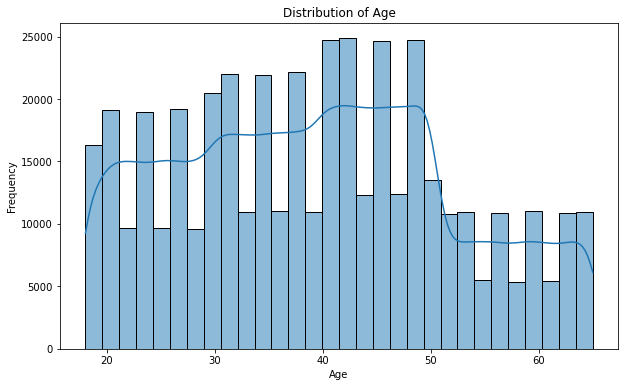

In [20]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df_training['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

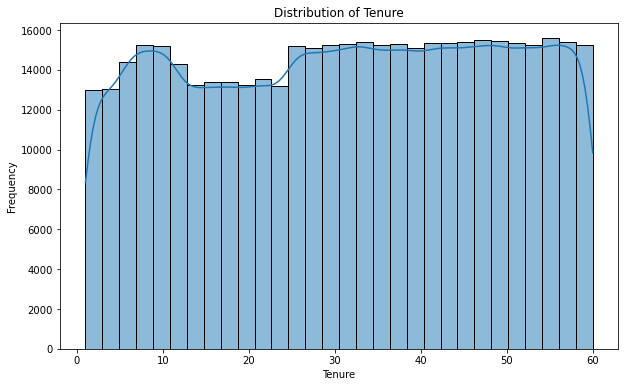

In [21]:
# Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(df_training['Tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

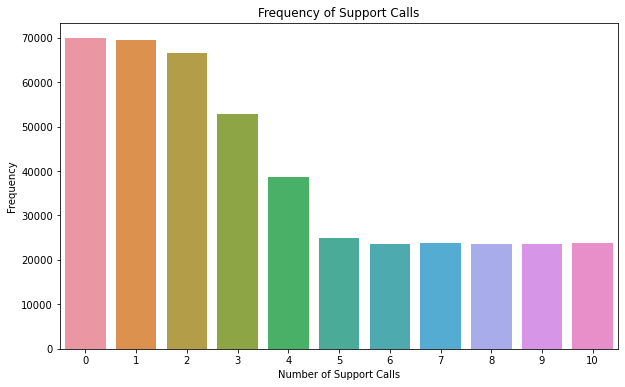

In [22]:
# Distribution of Support Calls
plt.figure(figsize=(10, 6))
sns.countplot(data=df_training, x='Support Calls')
plt.title('Frequency of Support Calls')
plt.xlabel('Number of Support Calls')
plt.ylabel('Frequency')
plt.show()

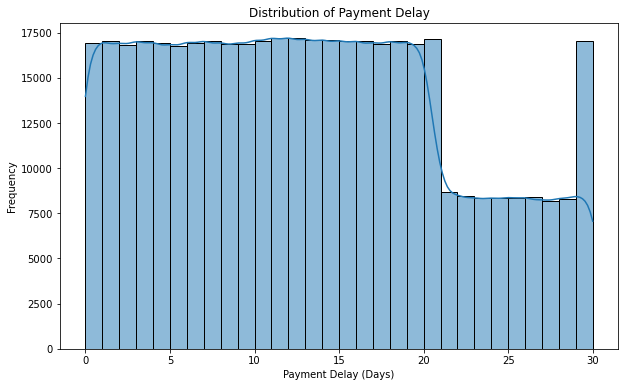

In [23]:
# Distribution of Payment Delay
plt.figure(figsize=(10, 6))
sns.histplot(df_training['Payment Delay'], bins=30, kde=True)
plt.title('Distribution of Payment Delay')
plt.xlabel('Payment Delay (Days)')
plt.ylabel('Frequency')
plt.show()

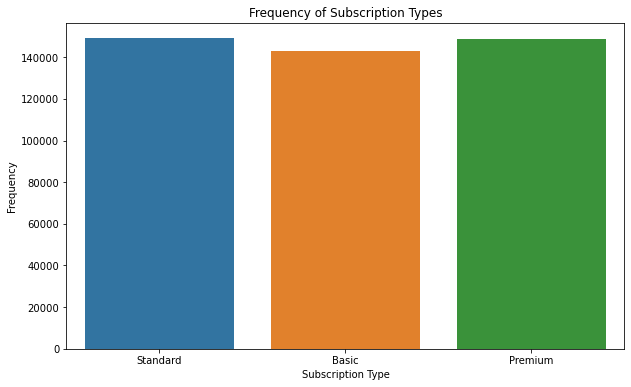

In [24]:
# Subscription Types and their frequencies
plt.figure(figsize=(10, 6))
sns.countplot(data=df_training, x='Subscription Type')
plt.title('Frequency of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Frequency')
plt.show()

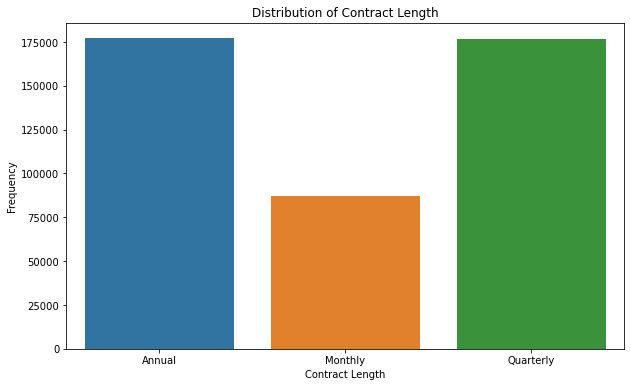

In [25]:
# Distribution of Contract Length
plt.figure(figsize=(10, 6))
sns.countplot(data=df_training, x='Contract Length')
plt.title('Distribution of Contract Length')
plt.xlabel('Contract Length')
plt.ylabel('Frequency')
plt.show()

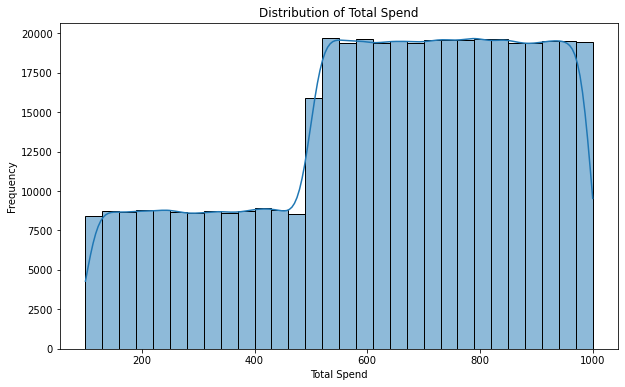

In [26]:
# Distribution of Total Spend
plt.figure(figsize=(10, 6))
sns.histplot(df_training['Total Spend'], bins=30, kde=True)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

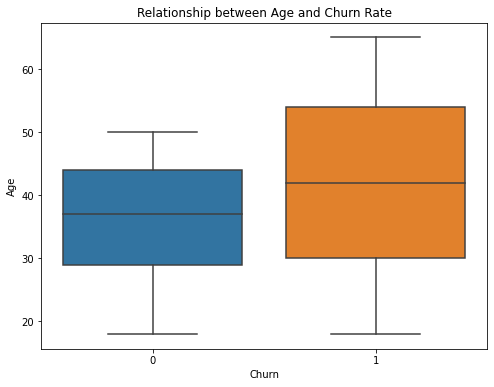

In [27]:
# Is there a relationship between Age and Churn rate?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Age', data=df_training)
plt.title('Relationship between Age and Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

## The churn rate appears to be higher for younger customers than for older customers 

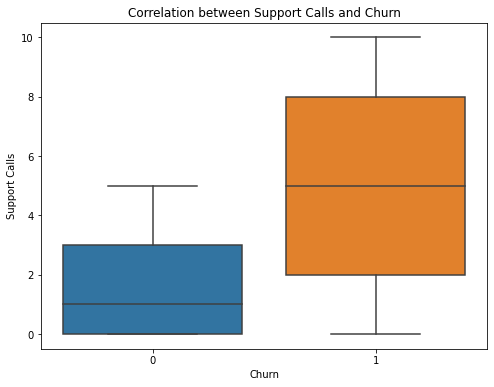

In [28]:
# correlation between Support Calls and Churn?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Support Calls', data=df_training)
plt.title('Correlation between Support Calls and Churn')
plt.xlabel('Churn')
plt.ylabel('Support Calls')
plt.show()


## customers who make more support calls are more likely to churn

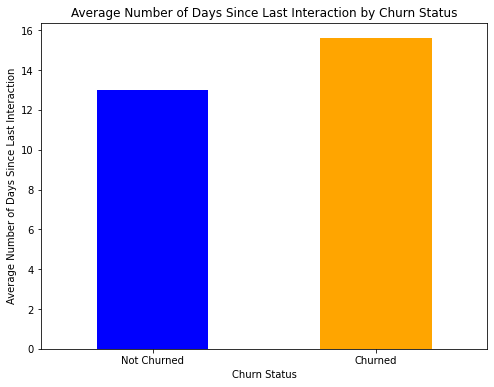

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


churn_last_interaction = df_training.groupby('Churn')['Last Interaction'].mean()

plt.figure(figsize=(8, 6))
churn_last_interaction.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number of Days Since Last Interaction by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Number of Days Since Last Interaction')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.show()


## Customers who haven't interacted for a longer period are more likely to churn.

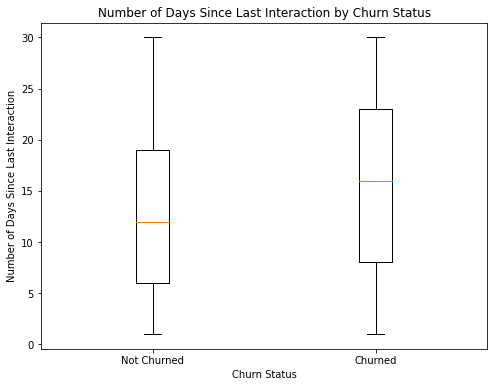

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.boxplot([df_training[df_training['Churn'] == 0]['Last Interaction'], df_training[df_training['Churn'] == 1]['Last Interaction']], labels=['Not Churned', 'Churned'])
plt.title('Number of Days Since Last Interaction by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Days Since Last Interaction')
plt.show()


In [31]:
import pandas as pd

def analyze_churn(df_training):
  
  avg_days_churned = df_training[df_training['Churn'] == 1]['Last Interaction'].mean()

  churn_window = df_training.groupby('Last Interaction')['Churn'].mean().sort_values(ascending=False).index[0]

  insights = {
      "avg_days_churned": avg_days_churned,
      "churn_window": churn_window}

  print("Average days since last interaction before churn:", avg_days_churned)
  print("Window where churn is most likely:", churn_window, "days")

  return insights

insights = analyze_churn(df_training.copy())


Average days since last interaction before churn: 15.604546418185672
Window where churn is most likely: 23 days


In [32]:
import pandas as pd

churn_rate = df_training[df_training['Churn'] == True].shape[0] / len(df_training)

print("\nChurn Rate:")
print(churn_rate)



Churn Rate:
0.5671071972996515


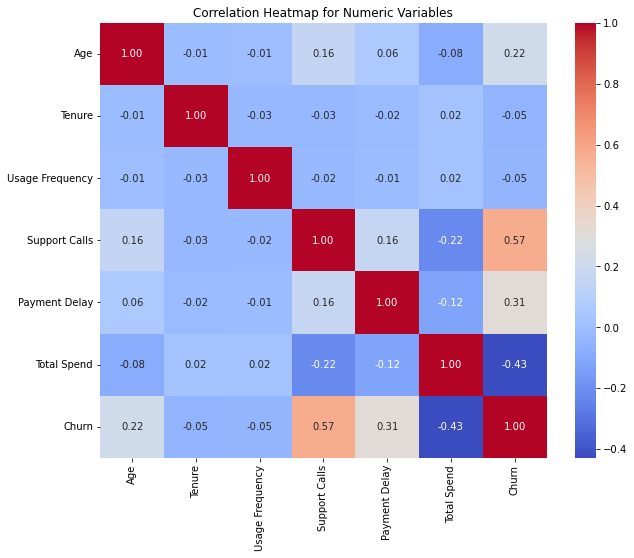

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_vars = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Churn']
numeric_corr = df_training[numeric_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()


In [34]:
import pandas as pd

average_total_spend = df_training['Total Spend'].mean()

# Count the number of customers with total spend greater than average
num_customers_above_average = df_training[df_training['Total Spend'] > average_total_spend].shape[0]

print("Number of customers with total spend greater than average:", num_customers_above_average)


Number of customers with total spend greater than average: 239267


In [35]:
import pandas as pd


# Calculate the average total spend
average_total_spend = df_training['Total Spend'].mean()

# Filter the DataFrame for churned customers with total spend greater than average
churned_above_average = df_training[(df_training['Total Spend'] > average_total_spend) & (df_training['Churn'] == 1)].shape[0]

# Filter the DataFrame for non-churned customers with total spend greater than average
non_churned_above_average = df_training[(df_training['Total Spend'] > average_total_spend) & (df_training['Churn'] == 0)].shape[0]

print("Number of churned customers with total spend greater than average:", churned_above_average)
print("Number of non-churned customers with total spend greater than average:", non_churned_above_average)


Number of churned customers with total spend greater than average: 98749
Number of non-churned customers with total spend greater than average: 140518


In [36]:
import pandas as pd


# Calculate the average total spend
average_total_spend = df_training['Total Spend'].mean()

# Count the total number of customers
total_customers = df_training.shape[0]

# Filter the DataFrame for churned customers with total spend greater than average
churned_above_average = df_training[(df_training['Total Spend'] > average_total_spend) & (df_training['Churn'] == 1)].shape[0]

# Filter the DataFrame for non-churned customers with total spend greater than average
non_churned_above_average = df_training[(df_training['Total Spend'] > average_total_spend) & (df_training['Churn'] == 0)].shape[0]

# Calculate percentages
percentage_churned_above_average = (churned_above_average / total_customers) * 100
percentage_non_churned_above_average = (non_churned_above_average / total_customers) * 100

print("Percentage of churned customers with total spend greater than average:", percentage_churned_above_average, "%")
print("Percentage of non-churned customers with total spend greater than average:", percentage_non_churned_above_average, "%")


Percentage of churned customers with total spend greater than average: 22.400597052845526 %
Percentage of non-churned customers with total spend greater than average: 31.87563516260163 %


In [37]:
import pandas as pd


# Calculate the average total spend
average_total_spend = df_training['Total Spend'].mean()

# Count the total number of customers
total_customers = df_training.shape[0]

# Filter the DataFrame for churned customers with total spend greater than average
churned_above_average = df_training[(df_training['Total Spend'] < average_total_spend) & (df_training['Churn'] == 1)].shape[0]

# Filter the DataFrame for non-churned customers with total spend greater than average
non_churned_above_average = df_training[(df_training['Total Spend'] < average_total_spend) & (df_training['Churn'] == 0)].shape[0]

# Calculate percentages
percentage_churned_above_average = (churned_above_average / total_customers) * 100
percentage_non_churned_above_average = (non_churned_above_average / total_customers) * 100

print("Percentage of churned customers with total spend lower than average:", percentage_churned_above_average, "%")
print("Percentage of non-churned customers with total spend lower than average:", percentage_non_churned_above_average, "%")


Percentage of churned customers with total spend lower than average: 34.31012267711963 %
Percentage of non-churned customers with total spend lower than average: 11.413645107433217 %


### so if customers are tend to spend less money(less than avg) 
### then they are at high risk of getting churned. already 34% got churned so that 11% has high risk of getting churned

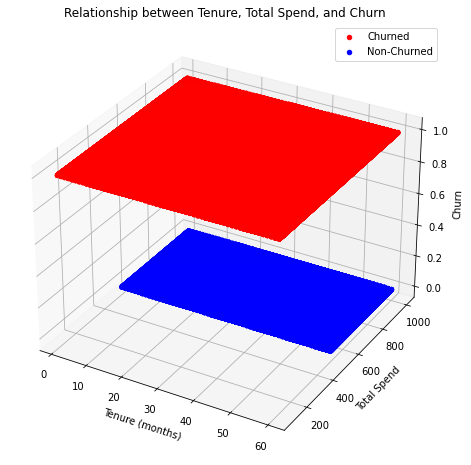

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with the actual variable name if it's different

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for churned customers
churned_customers = df_training[df_training['Churn'] == 1]
ax.scatter(churned_customers['Tenure'], churned_customers['Total Spend'], churned_customers['Churn'], color='red', label='Churned')

# Scatter plot for non-churned customers
non_churned_customers = df_training[df_training['Churn'] == 0]
ax.scatter(non_churned_customers['Tenure'], non_churned_customers['Total Spend'], non_churned_customers['Churn'], color='blue', label='Non-Churned')

# Set labels and title
ax.set_xlabel('Tenure (months)')
ax.set_ylabel('Total Spend')
ax.set_zlabel('Churn')
ax.set_title('Relationship between Tenure, Total Spend, and Churn')

# Show the plot
plt.legend()
plt.show()


## The churn rate is highest for customers with low tenure (less than 20 months) and low total spend (less than 200)
## the churn rate decreases as tenure and total spend increase.
## Customers with the highest tenure (over 60 months) and total spend (over 1000) have the lowest churn rate.

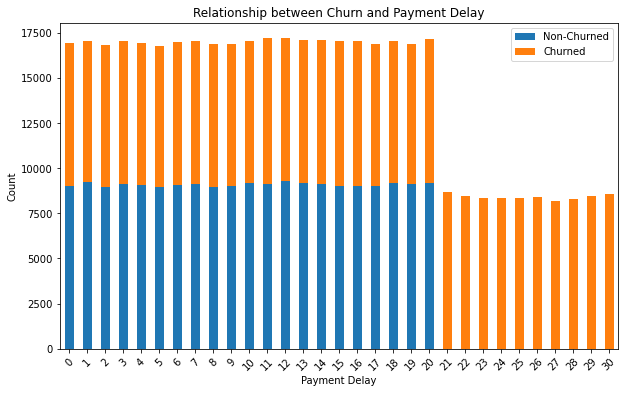

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with the actual variable name if it's different

# Group data by payment delay and churn, and count occurrences
payment_delay_churn_counts = df_training.groupby(['Payment Delay', 'Churn']).size().unstack()

# Plot the bar plot
payment_delay_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Churn and Payment Delay')
plt.xlabel('Payment Delay')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Churned', 'Churned'])
plt.show()


## as payment delay days increases churning is increasing


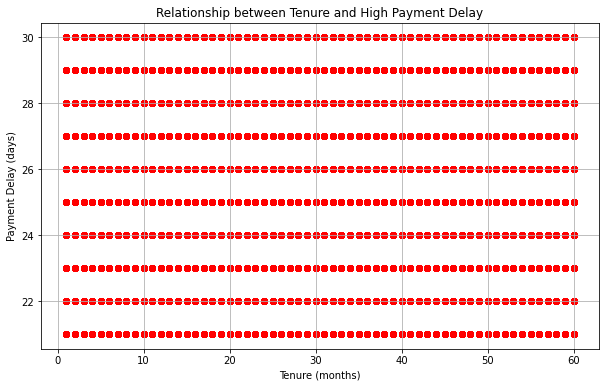

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with the actual variable name if it's different

# Filter customers with payment delay more than 20 days
high_payment_delay_customers = df_training[df_training['Payment Delay'] > 20]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(high_payment_delay_customers['Tenure'], high_payment_delay_customers['Payment Delay'], color='red')

# Set labels and title
plt.title('Relationship between Tenure and High Payment Delay')
plt.xlabel('Tenure (months)')
plt.ylabel('Payment Delay (days)')

# Show the plot
plt.grid(True)
plt.show()


## customers with a longer tenure (who have been with the company for a longer time) tend to have lower payment delays.

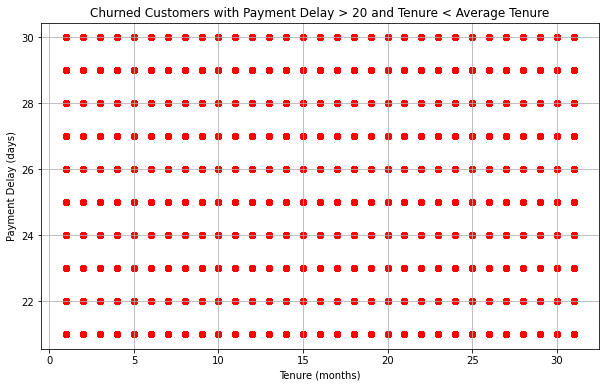

Number of churned customers with payment delay > 20 and tenure < average tenure: 43381


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df_training'
# Replace 'df_training' with the actual variable name if it's different

# Calculate the average tenure
average_tenure = df_training['Tenure'].mean()

# Filter churned customers with payment delay > 20 days and tenure < average tenure
churned_high_delay_low_tenure = df_training[(df_training['Payment Delay'] > 20) & (df_training['Tenure'] < average_tenure) & (df_training['Churn'] == 1)]

# Count the number of churned customers
num_churned_high_delay_low_tenure = churned_high_delay_low_tenure.shape[0]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(churned_high_delay_low_tenure['Tenure'], churned_high_delay_low_tenure['Payment Delay'], color='red')

# Set labels and title
plt.title('Churned Customers with Payment Delay > 20 and Tenure < Average Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Payment Delay (days)')

# Show the plot
plt.grid(True)
plt.show()

# Print the number of churned customers
print("Number of churned customers with payment delay > 20 and tenure < average tenure:", num_churned_high_delay_low_tenure)


## total churn :249999
## therefore 17.3% customers churned out with less tenure and more payment delay

<Figure size 720x432 with 0 Axes>

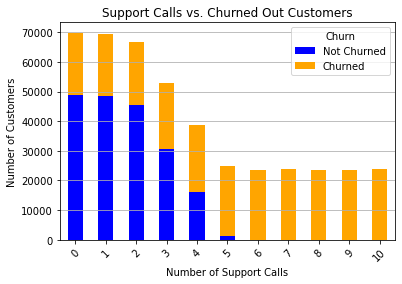

In [42]:
# Count the number of churned and non-churned customers for each number of support calls
support_churn_counts = df_training.groupby('Support Calls')['Churn'].value_counts().unstack(fill_value=0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
support_churn_counts.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Support Calls vs. Churned Out Customers')
plt.xlabel('Number of Support Calls')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.grid(axis='y')
plt.show()

### customers with more support calls churned out more 
### this tells that customers with more unresolved issues churned out a lot
### we can retain customers by strengthening customer support team, training them to handle customers effectively,
### checking weather customers' problem resolved or not


In [43]:
# Filter the DataFrame to include only rows where Support Calls > 5
support_calls_gt_5_df = df_training[df_training['Support Calls'] > 5]

# Count the number of churned out customers
num_churned_out_customers = support_calls_gt_5_df['Churn'].sum()

print("Number of churned out customers with support calls > 5:", num_churned_out_customers)

Number of churned out customers with support calls > 5: 118513


### 47% of churned out customers had made more support calls(>5) which means they churned out because of unresolved issues

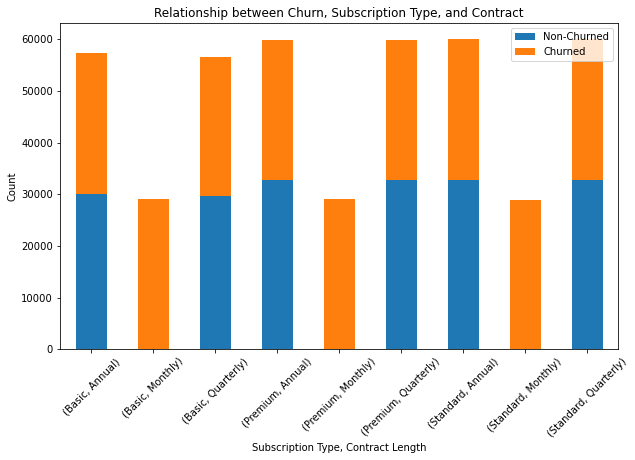

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df_training'
# Replace 'df_training' with the actual variable name if it's different

# Group data by subscription type, contract, and churn, and count occurrences
subscription_contract_churn_counts = df_training.groupby(['Subscription Type', 'Contract Length', 'Churn']).size().unstack()

# Plot the stacked bar plot
subscription_contract_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Churn, Subscription Type, and Contract')
plt.xlabel('Subscription Type, Contract Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Churned', 'Churned'])
plt.show()


### customers on annual contracts tend to have a lower churn rate than customers on monthly contracts. 

### This is true for all three subscription types (Basic, Standard and Premium).

### customers who opted for premium monthly contact(35%) got churned 
### std monthly and basic monthly contract also same affect 
### price may be the reason


# DATA PREPROCESSING

### NORMALIZATION

In [45]:
#Normalzation is not needed for customer id as its not a numeric col that affect the target variable but helps to identify uniue customers
import pandas as pd
# Convert 'ID' column to categorical
df_training['CustomerID'] = df_training['CustomerID'].astype('category')

print(df_training.dtypes)  # Check data types after conversion


CustomerID           category
Age                     int32
Gender                 object
Tenure                  int32
Usage Frequency         int32
Support Calls           int32
Payment Delay           int32
Subscription Type      object
Contract Length        object
Total Spend             int32
Last Interaction        int32
Churn                   int32
dtype: object


C:\Users\user\AppData\Local\Temp\ipykernel_11172\2044713736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training['CustomerID'] = df_training['CustomerID'].astype('category')


In [46]:
#Normalzation is not needed for customer id as its not a numeric col that affect the target variable but helps to identify uniue customers
import pandas as pd
# Convert 'ID' column to categorical
df_testing['CustomerID'] = df_testing['CustomerID'].astype('category')

print(df_testing.dtypes)  # Check data types after conversion


CustomerID           category
Age                     int64
Gender                 object
Tenure                  int64
Usage Frequency         int64
Support Calls           int64
Payment Delay           int64
Subscription Type      object
Contract Length        object
Total Spend             int64
Last Interaction        int64
Churn                   int64
dtype: object


### finding outliers using IQR 

In [47]:
# Function to detect outliers using IQR method
def detect_outliers(df_training):
    outliers = pd.DataFrame()
    for column in df_training.columns:
        if pd.api.types.is_numeric_dtype(df_training[column]):
            Q1 = df_training[column].quantile(0.25)
            Q3 = df_training[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df_training[column][(df_training[column] < lower_bound) | (df_training[column] > upper_bound)]

    return outliers  

outliers = detect_outliers(df_training)
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [Age, Tenure, Usage Frequency, Support Calls, Payment Delay, Total Spend, Last Interaction, Churn]
Index: []


In [48]:
def detect_outlier(df_testing):
    outlier = pd.DataFrame()
    for column in df_testing.columns:
        if pd.api.types.is_numeric_dtype(df_testing[column]):
            Q1 = df_testing[column].quantile(0.25)
            Q3 = df_testing[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier[column] = df_testing[column][(df_testing[column] < lower_bound) | (df_testing[column] > upper_bound)]

    return outlier  

outlier = detect_outlier(df_testing)
print("Outliers:")
print(outlier)

Outliers:
Empty DataFrame
Columns: [Age, Tenure, Usage Frequency, Support Calls, Payment Delay, Total Spend, Last Interaction, Churn]
Index: []


### DATA TRANSFORMATION (before normalization we need to convert categoric col to numeric col)

In [49]:
### one hot encoding

In [50]:
import pandas as pd



# Apply One-Hot Encoding using pandas get_dummies() function
one_hot_encoded = pd.get_dummies(df_training['Gender'], prefix='Gender')
one_hot_encodeds = pd.get_dummies(df_training['Subscription Type'], prefix='Subscription')
one_hot_encodedes = pd.get_dummies(df_training['Contract Length'], prefix='contract')

# Concatenate the original DataFrame with the one-hot encoded columns
df_training = pd.concat([df_training, one_hot_encoded], axis=1)
df_training = pd.concat([df_training, one_hot_encodeds], axis=1)
df_training = pd.concat([df_training, one_hot_encodedes], axis=1)

df_training.drop('Gender', axis=1, inplace=True)
df_training.drop('Subscription Type', axis=1, inplace=True)
df_training.drop('Contract Length', axis=1, inplace=True)


df_training


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription_Basic,Subscription_Premium,Subscription_Standard,contract_Annual,contract_Monthly,contract_Quarterly
0,2,30,39,14,5,18,932,17,1,1,0,0,0,1,1,0,0
1,3,65,49,1,10,8,557,6,1,1,0,1,0,0,0,1,0
2,4,55,14,4,6,18,185,3,1,1,0,1,0,0,0,0,1
3,5,58,38,21,7,7,396,29,1,0,1,0,0,1,0,1,0
4,6,23,32,20,5,8,617,20,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995,42,54,15,1,3,716,8,0,0,1,0,1,0,1,0,0
440829,449996,25,8,13,1,20,745,2,0,1,0,0,1,0,1,0,0
440830,449997,26,35,27,1,5,977,9,0,0,1,0,0,1,0,0,1
440831,449998,28,55,14,2,0,602,2,0,0,1,0,0,1,0,0,1


In [51]:
# Apply One-Hot Encoding using pandas get_dummies() function
on_hot_encoded = pd.get_dummies(df_testing['Gender'], prefix='Gender')
on_hot_encodeds = pd.get_dummies(df_testing['Subscription Type'], prefix='Subscription')
on_hot_encodedes = pd.get_dummies(df_testing['Contract Length'], prefix='contract')

# Concatenate the original DataFrame with the one-hot encoded columns
df_testing = pd.concat([df_testing, on_hot_encoded], axis=1)
df_testing = pd.concat([df_testing, on_hot_encodeds], axis=1)
df_testing = pd.concat([df_testing, on_hot_encodedes], axis=1)

df_testing.drop('Gender', axis=1, inplace=True)
df_testing.drop('Subscription Type', axis=1, inplace=True)
df_testing.drop('Contract Length', axis=1, inplace=True)


df_testing


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription_Basic,Subscription_Premium,Subscription_Standard,contract_Annual,contract_Monthly,contract_Quarterly
0,1,22,25,14,4,27,598,9,1,1,0,1,0,0,0,1,0
1,2,41,28,28,7,13,584,20,0,1,0,0,0,1,0,1,0
2,3,47,27,10,2,29,757,21,0,0,1,0,1,0,1,0,0
3,4,35,9,12,5,17,232,18,0,0,1,0,1,0,0,0,1
4,5,53,58,24,9,2,533,18,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,33,12,6,21,947,14,1,1,0,1,0,0,0,0,1
64370,64371,37,6,1,5,22,923,9,1,0,1,0,0,1,1,0,0
64371,64372,25,39,14,8,30,327,20,1,0,1,0,1,0,0,1,0
64372,64373,50,18,19,7,22,540,13,1,1,0,0,0,1,0,1,0


In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset

# Separate numeric columns (excluding "Churn")
numeric_cols = df_testing.select_dtypes(include=['int64']).columns.drop('Churn')

# Apply StandardScaler to normalize numeric columns
scaler = StandardScaler()
df_testing[numeric_cols] = scaler.fit_transform(df_testing[numeric_cols])

# Now, df_testing contains normalized numeric columns
df_testing.head()  # You can print the first few rows to verify normalization


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription_Basic,Subscription_Premium,Subscription_Standard,contract_Annual,contract_Monthly,contract_Quarterly
0,1,-1.434202,-0.409100,-0.122526,-0.449807,1.114538,0.218408,-0.752324,1,1,0,1,0,0,0,1,0
1,2,-0.069730,-0.233642,1.465424,0.513590,-0.467000,0.164742,0.521065,0,1,0,0,0,1,0,1,0
2,3,0.361155,-0.292128,-0.576225,-1.092072,1.340472,0.827900,0.636827,0,0,1,0,1,0,1,0,0
3,4,-0.500616,-1.344876,-0.349375,-0.128674,-0.015132,-1.184575,0.289540,0,0,1,0,1,0,0,0,1
4,5,0.792041,1.520939,1.011724,1.155855,-1.709637,-0.030756,0.289540,0,1,0,0,0,1,1,0,0


In [53]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   CustomerID             440832 non-null  category
 1   Age                    440832 non-null  int32   
 2   Tenure                 440832 non-null  int32   
 3   Usage Frequency        440832 non-null  int32   
 4   Support Calls          440832 non-null  int32   
 5   Payment Delay          440832 non-null  int32   
 6   Total Spend            440832 non-null  int32   
 7   Last Interaction       440832 non-null  int32   
 8   Churn                  440832 non-null  int32   
 9   Gender_Female          440832 non-null  uint8   
 10  Gender_Male            440832 non-null  uint8   
 11  Subscription_Basic     440832 non-null  uint8   
 12  Subscription_Premium   440832 non-null  uint8   
 13  Subscription_Standard  440832 non-null  uint8   
 14  contract_Annual     

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Separate numeric columns (excluding "Churn")
numeric_cols = df_training.select_dtypes(include=['int32']).columns.drop('Churn')

# Apply StandardScaler to normalize numeric columns
scaler = StandardScaler()
df_training[numeric_cols] = scaler.fit_transform(df_training[numeric_cols])

# Now, df_testing contains normalized numeric columns
df_training.head()  # You can print the first few rows to verify normalization


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription_Basic,Subscription_Premium,Subscription_Standard,contract_Annual,contract_Monthly,contract_Quarterly
0,2,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.248971,0.293052,1,1,0,0,0,1,1,0,0
1,3,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.308840,-0.986584,1,1,0,1,0,0,0,1,0
2,4,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854188,-1.335575,1,1,0,1,0,0,0,0,1
3,5,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.977660,1.689018,1,0,1,0,0,1,0,1,0
4,6,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.059591,0.642043,1,0,1,1,0,0,0,1,0


In [55]:
df_testing

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription_Basic,Subscription_Premium,Subscription_Standard,contract_Annual,contract_Monthly,contract_Quarterly
0,1,-1.434202,-0.409100,-0.122526,-0.449807,1.114538,0.218408,-0.752324,1,1,0,1,0,0,0,1,0
1,2,-0.069730,-0.233642,1.465424,0.513590,-0.467000,0.164742,0.521065,0,1,0,0,0,1,0,1,0
2,3,0.361155,-0.292128,-0.576225,-1.092072,1.340472,0.827900,0.636827,0,0,1,0,1,0,1,0,0
3,4,-0.500616,-1.344876,-0.349375,-0.128674,-0.015132,-1.184575,0.289540,0,0,1,0,1,0,0,0,1
4,5,0.792041,1.520939,1.011724,1.155855,-1.709637,-0.030756,0.289540,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,0.217527,0.058789,-0.349375,0.192458,0.436736,1.556225,-0.173511,1,1,0,1,0,0,0,0,1
64370,64371,-0.356988,-1.520334,-1.597050,-0.128674,0.549703,1.464226,-0.752324,1,0,1,0,0,1,1,0,0
64371,64372,-1.218759,0.409705,-0.122526,0.834723,1.453439,-0.820413,0.521065,1,0,1,0,1,0,0,1,0
64372,64373,0.576598,-0.818502,0.444599,0.513590,0.549703,-0.003923,-0.289273,1,1,0,0,0,1,0,1,0


# Modelling

In [57]:


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define numerical features
numerical_features = ['contract_Quarterly', 'contract_Monthly','contract_Annual','Subscription_Standard','Subscription_Premium','Subscription_Basic','Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Load your training and testing data into X_train, y_train, X_test, y_test here
# For example:
X_train = df_training.drop(['CustomerID', 'Churn'], axis=1)
y_train = df_training['Churn']
X_test = df_testing.drop(['CustomerID', 'Churn'], axis=1)
y_test = df_testing['Churn']

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define numerical features
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Split the training and testing datasets into features and target
#X_train = df_training.drop(['CustomerID', 'Churn'], axis=1)
y_train = df_training['Churn']

X_test = df_testing.drop(['CustomerID', 'Churn'], axis=1)
y_test = df_testing['Churn']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

params = {
    'penalty': 'l2',  # L2 regularization
    'C': 1.0,         # Inverse of regularization strength
    'solver': 'liblinear',  # Algorithm for optimization
    'max_iter': 300,  # Maximum number of iterations
    'class_weight': None  # Class weights
}

# Initialize logistic regression model with hyperparameters
log_reg_model = LogisticRegression(**params)

# Train logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.639668189020412
Confusion Matrix:
[[13694 20187]
 [ 3009 27484]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.40      0.54     33881
           1       0.58      0.90      0.70     30493

    accuracy                           0.64     64374
   macro avg       0.70      0.65      0.62     64374
weighted avg       0.70      0.64      0.62     64374

